In [2]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Carregar o conjunto de dados

In [3]:

# Substitua 'sales_data.csv' pelo caminho do seu arquivo de dados
data = pd.read_csv('C:\PROJETOS\Portifolio GIHUB\Dados\index.csv')


In [4]:
# Exibir as primeiras linhas do conjunto de dados para entender sua estrutura
print(data.head())

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


# Limpeza de dados

In [5]:

# Remover valores ausentes
data.dropna(inplace=True)


# Conversão de tipos de dados

In [6]:

data.info()
# Garantir que a coluna 'Date' esteja no formato de data
data['date'] = pd.to_datetime(data['date'])
#data['datetime'] = pd.datetime(data['datetime'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1394
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1306 non-null   object 
 1   datetime     1306 non-null   object 
 2   cash_type    1306 non-null   object 
 3   card         1306 non-null   object 
 4   money        1306 non-null   float64
 5   coffee_name  1306 non-null   object 
dtypes: float64(1), object(5)
memory usage: 71.4+ KB


# Análise Exploratória de Dados (EDA)

In [7]:

# Calcular estatísticas descritivas básicas
print(data.describe())

             money
count  1306.000000
mean     31.915789
std       5.271754
min      18.120000
25%      27.920000
50%      32.820000
75%      37.720000
max      38.700000


In [8]:
# Visualização de Dados
# Configurar o estilo dos gráficos
sns.set(style='whitegrid')

# Criar um gráfico de linhas para visualizar as vendas ao longo do tempo

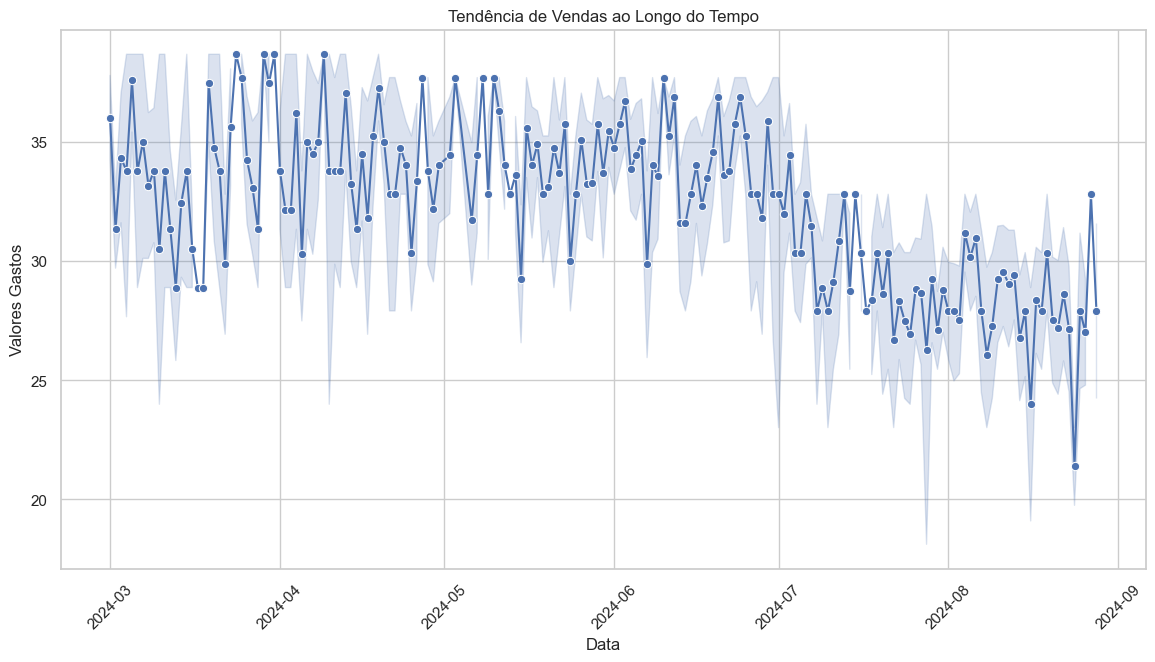

<Figure size 640x480 with 0 Axes>

In [9]:

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='money', data=data, marker='o')
# Adicionar título e rótulos aos eixos
plt.title('Tendência de Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valores Gastos')
# Rotacionar rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()
# Salvando a visualização
# Salvar o gráfico como um arquivo de imagem
plt.savefig('sales_trend.png')

# Conclusão
# Este script carrega, limpa e visualiza dados de vendas para identificar tendências ao longo do tempo.
# As visualizações ajudam a entender padrões sazonais e flutuações nas vendas.

# Analises

## Essa análises ajudam a entender melhor o comportamento dos clientes e as vendas, permitindo decisões mais informadas sobre estoque, promoções e operações.

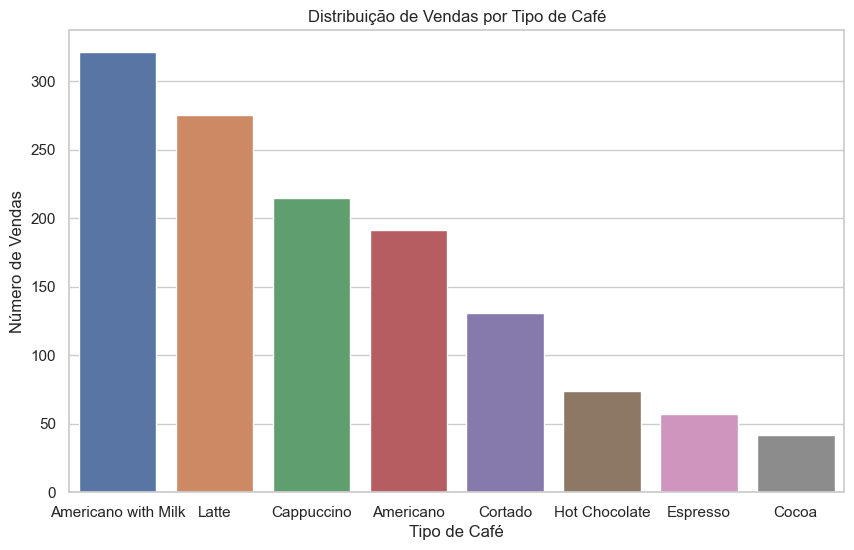

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Distribuição de Vendas por Tipo de Café
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coffee_name', order=data['coffee_name'].value_counts().index)
plt.title('Distribuição de Vendas por Tipo de Café')
plt.xlabel('Tipo de Café')
plt.ylabel('Número de Vendas')
plt.show()


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1394
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1306 non-null   datetime64[ns]
 1   datetime     1306 non-null   object        
 2   cash_type    1306 non-null   object        
 3   card         1306 non-null   object        
 4   money        1306 non-null   float64       
 5   coffee_name  1306 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 71.4+ KB


In [18]:
# Converter a coluna 'datetime' para o tipo datetime, caso ainda não tenha sido convertido
data['datetime'] = pd.to_datetime(data['datetime'])

# Extrair a hora da coluna 'datetime'
data['hour'] = data['datetime'].dt.hour

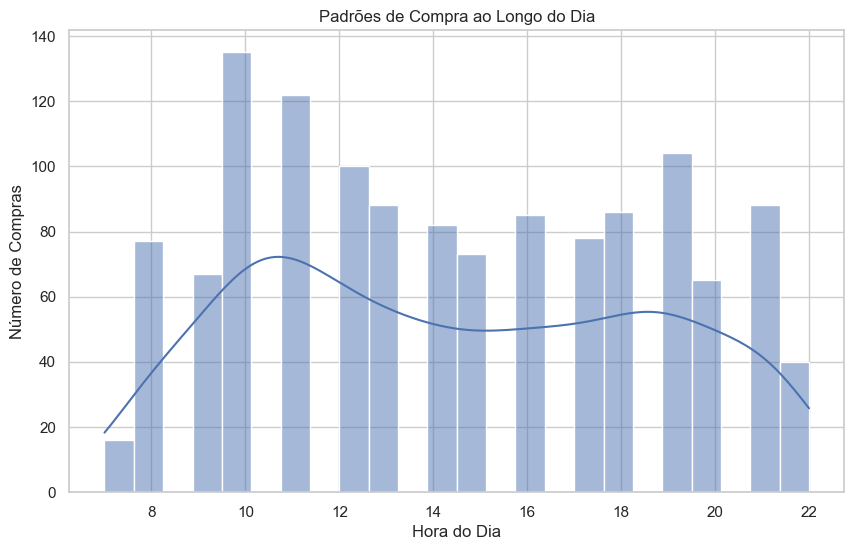

In [19]:
# 2. Padrões de Compra ao Longo do Dia


data['hour'] = data['datetime'].dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data['hour'], bins=24, kde=True)
plt.title('Padrões de Compra ao Longo do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Compras')
plt.show()

In [12]:
# 3. Gastos Médios por Transação
average_spending = data['money'].mean()
print(f"Gasto médio por transação: ${average_spending:.2f}")

Gasto médio por transação: $31.92


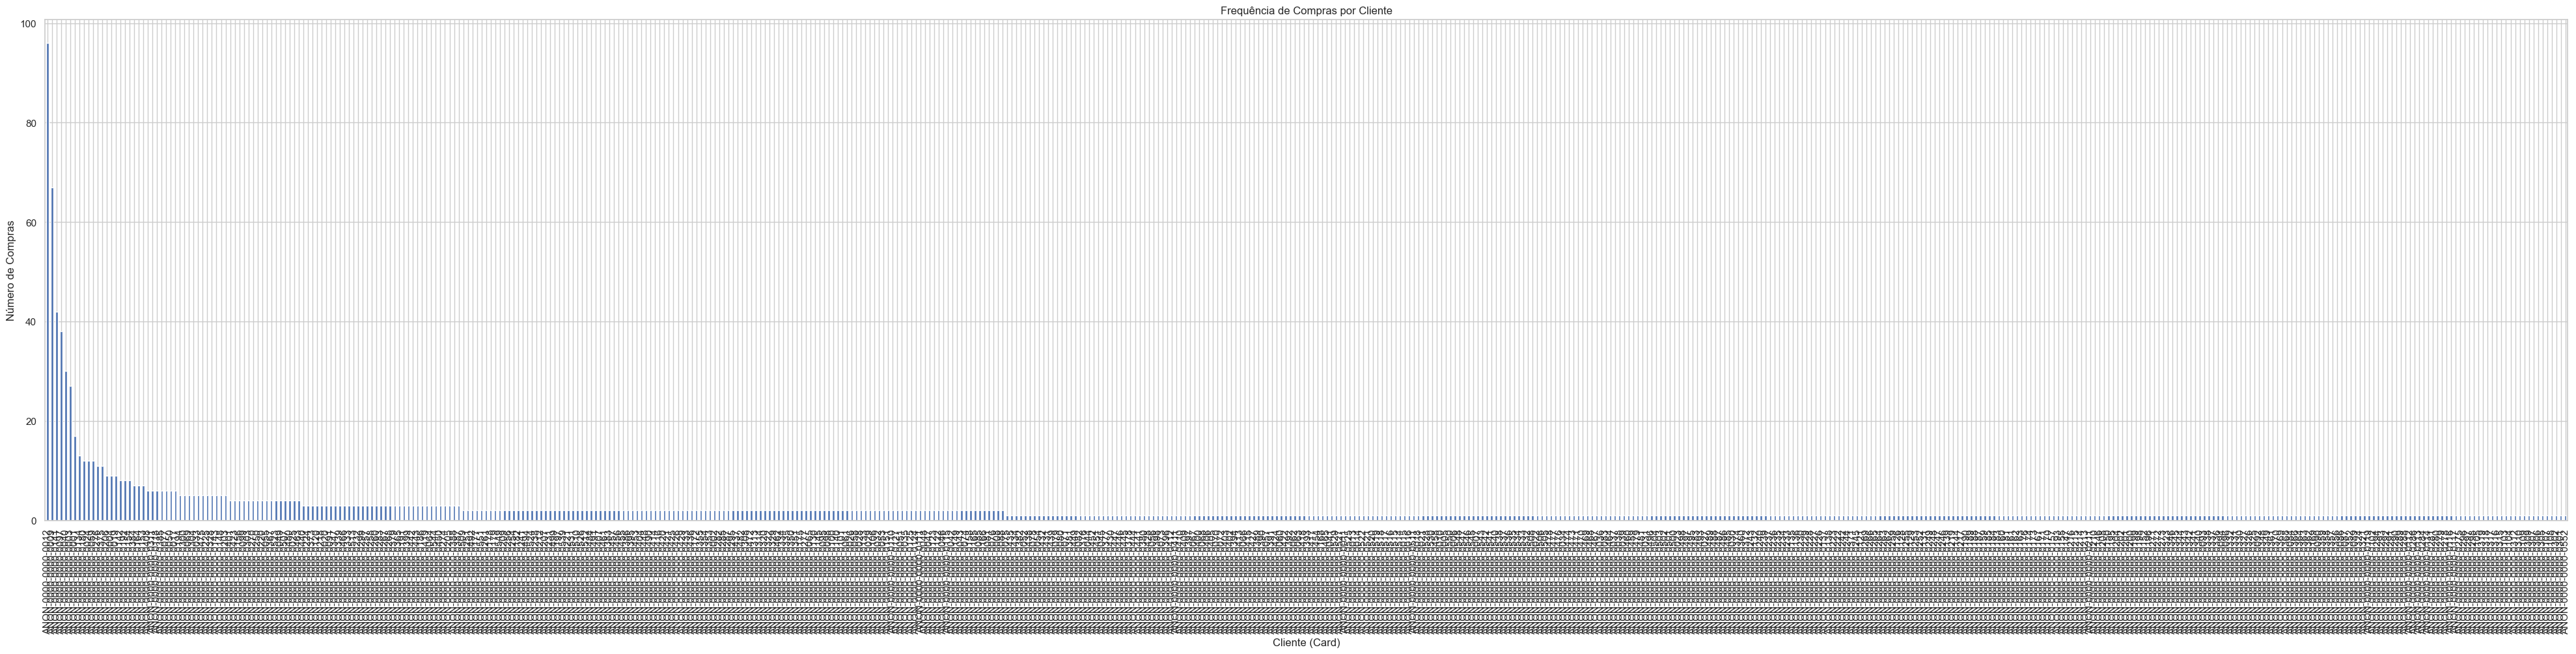

In [14]:
# 4. Frequência de Compras por Cliente
customer_frequency = data['card'].value_counts()
plt.figure(figsize=(50 ,10))
customer_frequency.plot(kind='bar')
plt.title('Frequência de Compras por Cliente')
plt.xlabel('Cliente (Card)')
plt.ylabel('Número de Compras')
plt.show()